# **Importing Packages**

Make sure to install the packages before importing if needed.

In [1]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import igraph
import leidenalg

# **Loading Data**

To see requirements for all AnnData objects (CELLxCELL): https://github.com/chanzuckerberg/single-cell-curation/blob/main/schema/7.0.0/schema.md.

In [94]:
## Emplacement pour elodie 
adata = sc.read_h5ad("/Users/elodiehusson/Desktop/AD & PD/AD_PD_CTRL.h5ad")
## Path Yara 
# adata = sc.read_h5ad("C:/Users/yarad/Desktop/x/Masters/Master BMC - Sorbonne/M2/Single Cell/Project/Coding Project/AD_PD_CTRL.h5ad")

# ajoutez vos emplacements ici du fichier, et juste mettez en commentaires les autres
# adata = sc.read_h5ad(".../.../subset_AD_PD_CTRL.h5ad")

adata_raw = adata.copy()


In [122]:
adata.var_keys

<bound method AnnData.var_keys of AnnData object with n_obs × n_vars = 128932 × 34176
    obs: 'Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'is_primary_data', 'AD_status', 'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status', 'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder', 'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry', 'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene_name', 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_condition', 'citat

The studied conditions are the following:

In [22]:
x = adata.obs.groupby(["disease", "AD_status", "Parkinson_disease"]).size()

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_95439/385958126.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = adata.obs.groupby(["disease", "AD_status", "Parkinson_disease"]).size()


## **Reduced Dataset's Metadata**

scanpy shows a structured summary:

In [23]:
adata

AnnData object with n_obs × n_vars = 128932 × 34176
    obs: 'Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'is_primary_data', 'AD_status', 'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status', 'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder', 'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry', 'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene_name', 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_term_id', 'schema_reference', 'sch

In [24]:
# This is the sparse matrix
print("adata.X type is :",type(adata.X))

print(adata.X[:5, :5])

adata.X type is : <class 'scipy.sparse._csr.csr_matrix'>
<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 4 stored elements and shape (5, 5)>
  Coords	Values
  (0, 2)	1.0
  (1, 4)	3.0
  (3, 3)	2.0
  (4, 3)	1.0


In [25]:
print(f"The variable adata has the following shape: {adata.shape}.")
print(f"There are {adata.shape[0]} cells and {adata.shape[1]} genes in this dataset.")

The variable adata has the following shape: (128932, 34176).
There are 128932 cells and 34176 genes in this dataset.


In [26]:
donors_per_disease = pd.crosstab(adata.obs["donor_id"],adata.obs["disease"])
donors_per_disease_summary = donors_per_disease.sum()

print("Number of donors per disease status:")
print(donors_per_disease_summary)

Number of donors per disease status:
disease
dementia || Alzheimer disease    78241
dementia || Parkinson disease     7772
normal                           42919
dtype: int64


In [27]:
print("The keys of adata.obs are the following:", adata.obs.keys())

adata.obs.head()

The keys of adata.obs are the following: Index(['Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype',
       'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id',
       'development_stage_ontology_term_id', 'sex_ontology_term_id',
       'donor_id', 'suspension_type', 'is_primary_data', 'AD_status',
       'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status',
       'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder',
       'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry',
       'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex',
       'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid'],
      dtype='object')


Source  n_genes  n_counts   class    subclass  \
barcodekey                                                                     
Donor_917-2-GTCCACTTCAACACCA-1      R     5615   20297.0      EN  EN_L2_3_IT   
Donor_972-2-CATCCGTTCACCTTGC-1      R     3127    6572.0   Oligo       Oligo   
Donor_82-2-ATCCCTGGTATCTTCT-0       R     2173    3458.0  Immune       Micro   
Donor_310-2-TAGATCGGTTAGTCGT-1      R     6404   21566.0      IN      IN_SST   
Donor_865-2-GAAGCGAAGTTGGGAC-1      R     5055   14487.0      IN      IN_VIP   

                                         subtype tissue_ontology_term_id  \
barcodekey                                                                 
Donor_917-2-GTCCACTTCAACACCA-1  EN_L2_3_IT_PDGFD          UBERON:0009834   
Donor_972-2-CATCCGTTCACCTTGC-1      Oligo_OPALIN          UBERON:0009834   
Donor_82-2-ATCCCTGGTATCTTCT-0              Micro          UBERON:0009834   
Donor_310-2-TAGATCGGTTAGTCGT-1      IN_SST_EDNRA          UBERON:0009834   
Donor_865-2-GAAGCGAAGTTGGGAC-1      IN_VIP_TRPC6          UBERON:0009834   

                               tissue_type assay_ontology_term_id  \
barcodekey                                                          
Donor_917-2-GTCCACTTCAACACCA-1      tissue            EFO:0009922   
Donor_972-2-CATCCGTTCACCTTGC-1      tissue            EFO:0009922   
Donor_82-2-ATCCCTGGTATCTTCT-0       tissue            EFO:0009922   
Donor_310-2-TAGATCGGTTAGTCGT-1      tissue            EFO:0009922   
Donor_865-2-GAAGCGAAGTTGGGAC-1      tissue            EFO:0009922   

                               cell_type_ontology_term_id  ...  \
barcodekey                                                 ...   
Donor_917-2-GTCCACTTCAACACCA-1                 CL:4030059  ...   
Donor_972-2-CATCCGTTCACCTTGC-1                 CL:0000128  ...   
Donor_82-2-ATCCCTGGTATCTTCT-0                  CL:0000129  ...   
Donor_310-2-TAGATCGGTTAGTCGT-1                 CL:4023017  ...   
Donor_865-2-GAAGCGAAGTTGGGAC-1                 CL:4023016  ...   

                               genetic_ancestry  \
barcodekey                                        
Donor_917-2-GTCCACTTCAACACCA-1          unknown   
Donor_972-2-CATCCGTTCACCTTGC-1          unknown   
Donor_82-2-ATCCCTGGTATCTTCT-0           unknown   
Donor_310-2-TAGATCGGTTAGTCGT-1          unknown   
Donor_865-2-GAAGCGAAGTTGGGAC-1       East Asian   

                                      disease_ontology_term_id  \
barcodekey                                                       
Donor_917-2-GTCCACTTCAACACCA-1  MONDO:0001627 || MONDO:0004975   
Donor_972-2-CATCCGTTCACCTTGC-1  MONDO:0001627 || MONDO:0004975   
Donor_82-2-ATCCCTGGTATCTTCT-0   MONDO:0001627 || MONDO:0004975   
Donor_310-2-TAGATCGGTTAGTCGT-1  MONDO:0001627 || MONDO:0004975   
Donor_865-2-GAAGCGAAGTTGGGAC-1  MONDO:0001627 || MONDO:0004975   

                                                                        cell_type  \
barcodekey                                                                          
Donor_917-2-GTCCACTTCAACACCA-1  L2/3 intratelencephalic projecting glutamaterg...   
Donor_972-2-CATCCGTTCACCTTGC-1                                    oligodendrocyte   
Donor_82-2-ATCCCTGGTATCTTCT-0                                     microglial cell   
Donor_310-2-TAGATCGGTTAGTCGT-1                 sst GABAergic cortical interneuron   
Donor_865-2-GAAGCGAAGTTGGGAC-1                 VIP GABAergic cortical interneuron   

                                    assay                        disease  \
barcodekey                                                                 
Donor_917-2-GTCCACTTCAACACCA-1  10x 3' v3  dementia || Alzheimer disease   
Donor_972-2-CATCCGTTCACCTTGC-1  10x 3' v3  dementia || Alzheimer disease   
Donor_82-2-ATCCCTGGTATCTTCT-0   10x 3' v3  dementia || Alzheimer disease   
Donor_310-2-TAGATCGGTTAGTCGT-1  10x 3' v3  dementia || Alzheimer disease   
Donor_865-2-GAAGCGAAGTTGGGAC-1  10x 3' v3  dementia || Alzheimer disease   

                                   sex  

In [28]:
print("Donor Names : \n", adata.obs_names)

print("Gene Names : \n", adata.var_names) # These are Ensembl IDs

Donor Names : 
 Index(['Donor_917-2-GTCCACTTCAACACCA-1', 'Donor_972-2-CATCCGTTCACCTTGC-1',
       'Donor_82-2-ATCCCTGGTATCTTCT-0', 'Donor_310-2-TAGATCGGTTAGTCGT-1',
       'Donor_865-2-GAAGCGAAGTTGGGAC-1', 'Donor_31-1-TGCAGATTCCACCTGT-0',
       'Donor_865-2-TCATCATAGGTACATA-1', 'Donor_865-1-TGACCCTTCCTTGAAG-0',
       'Donor_540-1-GCCAGCACACGTGTGC-0', 'Donor_137-1-TAACACGCATGACGAG-0',
       ...
       'Donor_609-1-TCATGCCAGTGGTTCT-0', 'Donor_634-2-CAGATCATCACTCCGT-0',
       'Donor_634-2-ACTCCCAGTGGATACG-0', 'Donor_721-1-CCGAACGAGGCATTTC-0',
       'Donor_609-2-TGGGCTGAGTACGTCT-1', 'Donor_735-1-GGTTCTCGTCTTCTAT-0',
       'Donor_735-2-CAACCTCCAACGATTC-1', 'Donor_721-1-CTGTATTTCTTCTCAA-0',
       'Donor_735-1-AACACACAGCACGTCC-0', 'Donor_735-2-GCAACATAGCGTACAG-1'],
      dtype='object', name='barcodekey', length=128932)
Gene Names : 
 Index(['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000971',

In [29]:
disease_list = list(adata.obs["disease"].cat.categories)

print("The types of disease in this dataset are :", disease_list)

The types of disease in this dataset are : ['dementia || Alzheimer disease', 'dementia || Parkinson disease', 'normal']


The number of cells per disease type in this dataset:

In [30]:
for disease_type in disease_list : 

    print(len(adata.obs["disease"][adata.obs["disease"] == disease_type]), " cells :", disease_type)

78241  cells : dementia || Alzheimer disease
7772  cells : dementia || Parkinson disease
42919  cells : normal


Gene metadata:

In [31]:
print("adata.var.keys :", adata.var.keys())

print("First 5 rows from adata.var:")
print(adata.var.head(5))

adata.var.keys : Index(['gene_name', 'n_cells', 'feature_is_filtered', 'feature_name',
       'feature_reference', 'feature_biotype', 'feature_length',
       'feature_type'],
      dtype='object')
First 5 rows from adata.var:
                gene_name  n_cells  feature_is_filtered feature_name  \
ENSG00000000003    TSPAN6   256237                False       TSPAN6   
ENSG00000000005      TNMD    21369                False         TNMD   
ENSG00000000419      DPM1  3001206                False         DPM1   
ENSG00000000457     SCYL3  1941205                False        SCYL3   
ENSG00000000460  C1orf112  1798664                False        FIRRM   

                feature_reference feature_biotype feature_length  \
ENSG00000000003    NCBITaxon:9606            gene           2396   
ENSG00000000005    NCBITaxon:9606            gene            873   
ENSG00000000419    NCBITaxon:9606            gene           1262   
ENSG00000000457    NCBITaxon:9606            gene           2916   


#### **Existing Embeddings**
It would be interesting and informative to compare existing embeddings to our results.

In [32]:
# Embeddings (UMAP, PCA...)
print("adata.obsm.keys :", adata.obsm.keys())

# Other information
print("adata.uns.keys :", adata.uns.keys())

adata.obsm.keys : KeysView(AxisArrays with keys: X_umap)
adata.uns.keys : dict_keys(['batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'subclass_colors', 'subtype_colors', 'title', 'uid'])


Based on the existing UMAPs, there does not seem to be a batch effect in our data. Remove the # to view the corresponding UMAP:

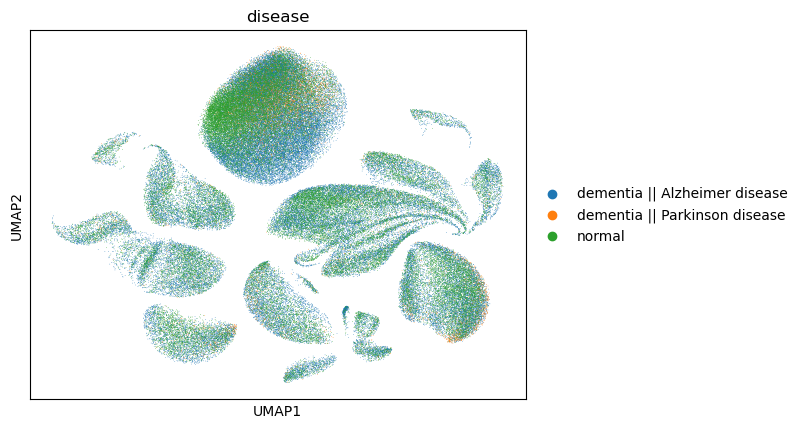

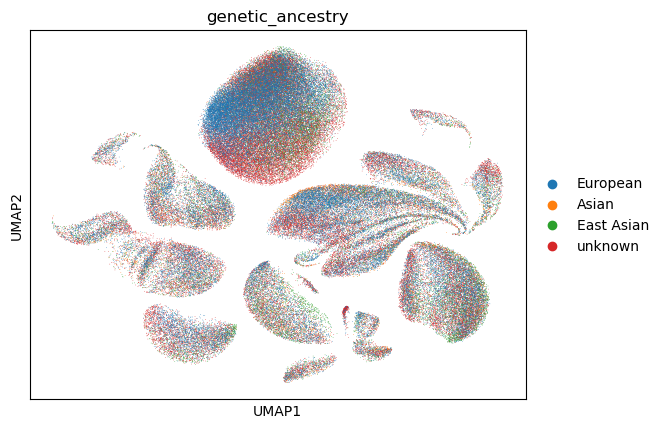

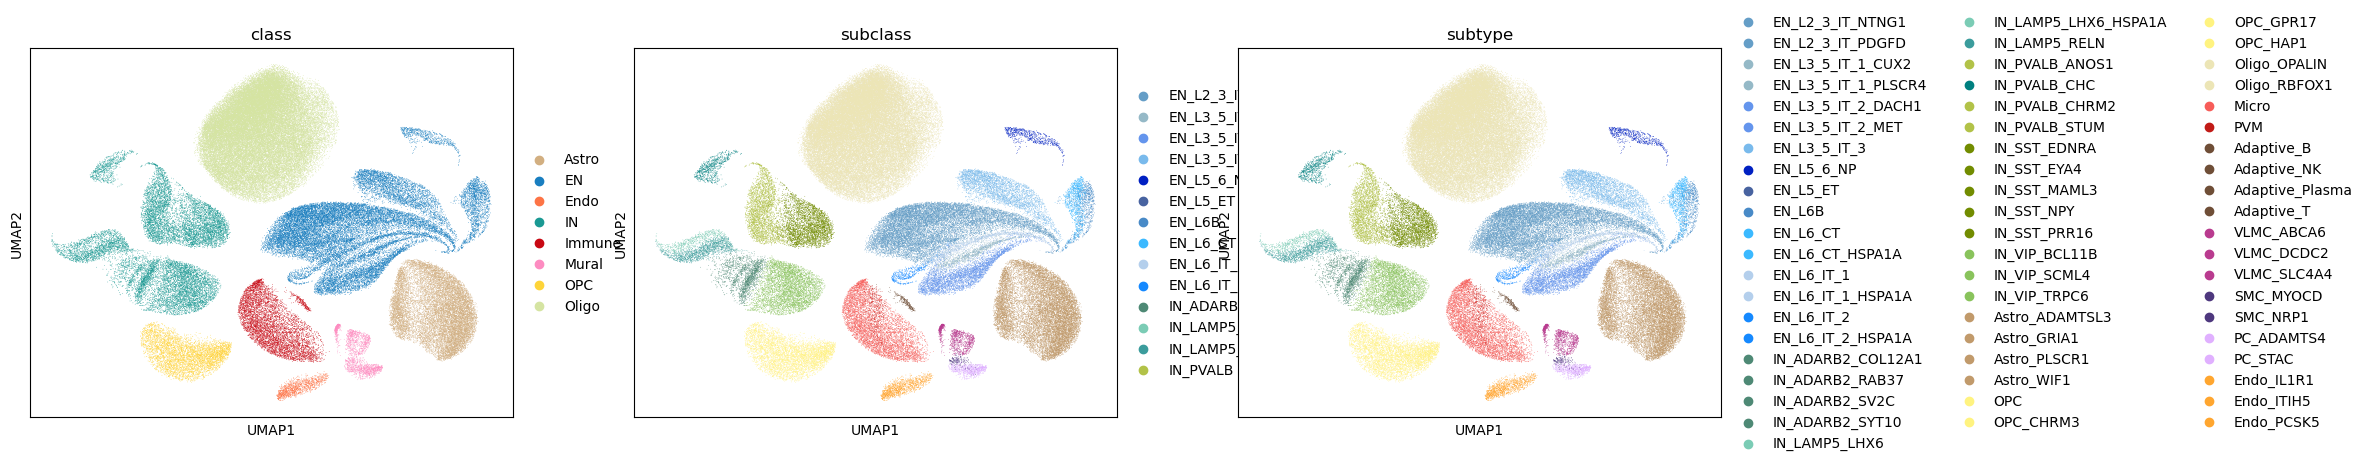

In [33]:
# sc.pl.umap(adata, color = 'cell_type')
sc.pl.umap(adata, color = 'disease')
sc.pl.umap(adata, color = 'genetic_ancestry')

# sc.pl.umap(adata, color = 'AD_status')
# sc.pl.umap(adata, color = 'sex')
# sc.pl.umap(adata, color = 'subclass')
# sc.pl.umap(adata, color = ['cell_type', 'subclass'])
sc.pl.umap(adata, color = ['class', 'subclass', 'subtype'])

# **RNAseq pipeline**

## 1. Quality Check

### a - Visualization of QC metrics

In [93]:
# 1. Calculation of QC metrics and addition to adata.obs
sc.pp.calculate_qc_metrics(adata, inplace = True)

# 2. Visualization of QC metrics before filtering
sc.pl.violin(
    adata, 
    ['n_counts', 'n_genes'], # Violin plot of number of genes and counts per cell
    jitter = 0.4,
    multi_panel = True
)

sc.pl.scatter(adata, x = 'n_counts', y = 'n_genes') # Scatter plot of number of genes vs. number of counts

KeyboardInterrupt: 

### b - Filtering out low quality cells

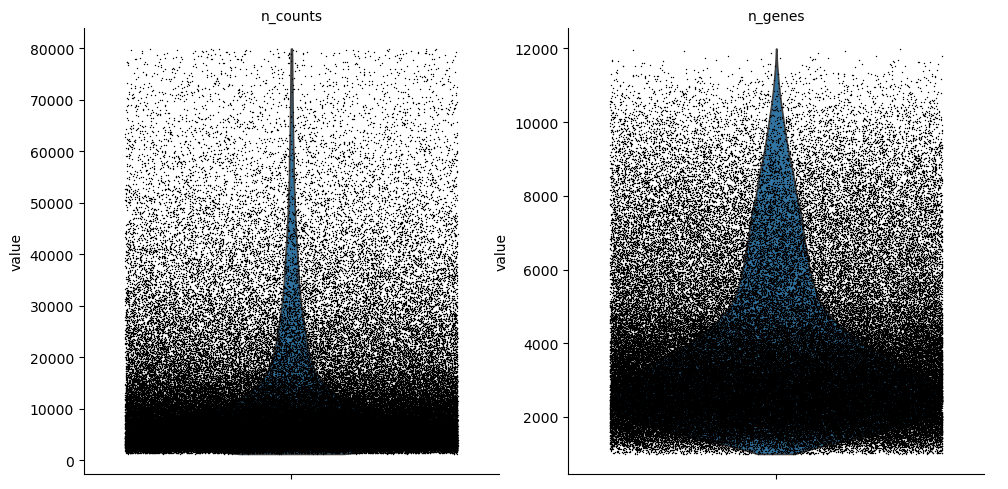

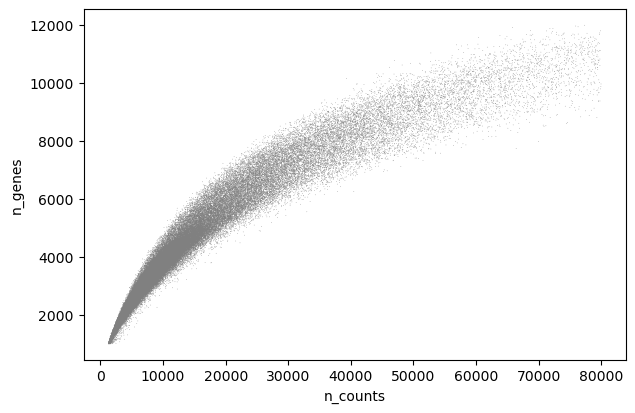

In [16]:
# 3. Application of filters
adata = adata[adata.obs['n_genes'] < 12000, :] # cutoff chosen: 12 000 genes

adata = adata[adata.obs['n_counts'] < 80000, :] # cutoff chosen: 80 000 counts

# 4. Visualization of QC metrics after filtering
sc.pl.violin(
    adata, 
    ['n_counts', 'n_genes'], # violin plot of number of genes and counts per cell
    jitter = 0.4,
    multi_panel = True
)

sc.pl.scatter(adata, x = 'n_counts', y = 'n_genes') # Scatter plot of number of genes vs. number of counts

### c - Filtering out mitochondrial genes

In [17]:
# Counting the number of mitochondrial genes
adata.var["mt"] = adata.var['gene_name'].str.startswith("MT-")

# Calculating QC metrics including the percentage of mitochondrial genes and adding them to adata.obs
sc.pp.calculate_qc_metrics(
    adata,
    qc_vars = ["mt"],
    inplace = True,
    log1p = True
)

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_93904/4025084783.py:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["mt"] = adata.var['gene_name'].str.startswith("MT-")


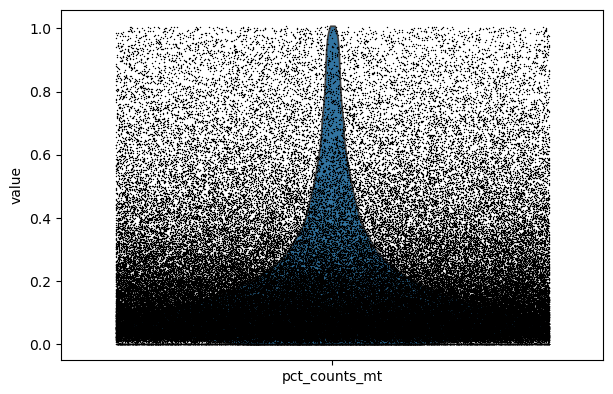

In [18]:
# Visualization of the percentage of mitochondrial genes
sc.pl.violin(
    adata,
    keys='pct_counts_mt',
    jitter = 0.4,
    rotation=  0,   
    stripplot = True,
    show = True
)

# data was already filtered on pct_counts_mt 
# it's weird because even before the filtering there was no cell with >10%. 
# They must have been filtered before
# I still keep the line just in case
# Filtering cells with more than 10% mitochondrial gene expression
adata_hvgadata = adata[adata.obs['pct_counts_mt'] < 10, :]


Here, we note that there were no cells with more than 10% mitochondrial gene expression in the dataset even before we applied our own filter. This means that the dataset did not contain such cells, either because of the nature of the data or because the dataset was already treated and filtered.

### d - Excluding ribosomal and hemoglobin genes
We will be keeping ribosomal genes, which make up 1.5% of genes expressed, and filtering out hemoglobin genes.

In [19]:
# 1m3s
# Ribosomal genes
adata.var["ribo"] = adata.var['gene_name'].str.startswith(("RPS", "RPL"))
print("proportion of ribo genes in all expressed genes : ", adata.var["ribo"].sum()/len(adata.var)*100)

# Hemoglobin genes
adata.var["hb"] = adata.var['gene_name'].str.contains("^HB[^(P)]")
print("Number of hemo genes before deletion : ", adata.var["hb"].sum())

# Confirming that hb genes were properly removed
genes_to_keep = ~adata.var["hb"]
adata = adata[:, genes_to_keep].copy()
print("Number of hemo genes after deletion: ", adata.var["hb"].sum())

proportion of ribo genes in all expressed genes :  1.5127574906367043
Number of hemo genes before deletion :  9
Number of hemo genes after deletion:  0


important : répercuter le même filtrage sur adata_raw

In [ ]:
adata_raw = adata_raw[adata.obs_names, adata.var_names].copy() #répercuter le même filtrage sur adata_raw

## 2. Normalization

this part was already performed, so we are not doing it again (How did they normalize?)

In [95]:
sc.pp.log1p(adata)

## 3. Highly Variable Genes (HVGs)

we kept 3000 highly variable genes out of 34176 genes


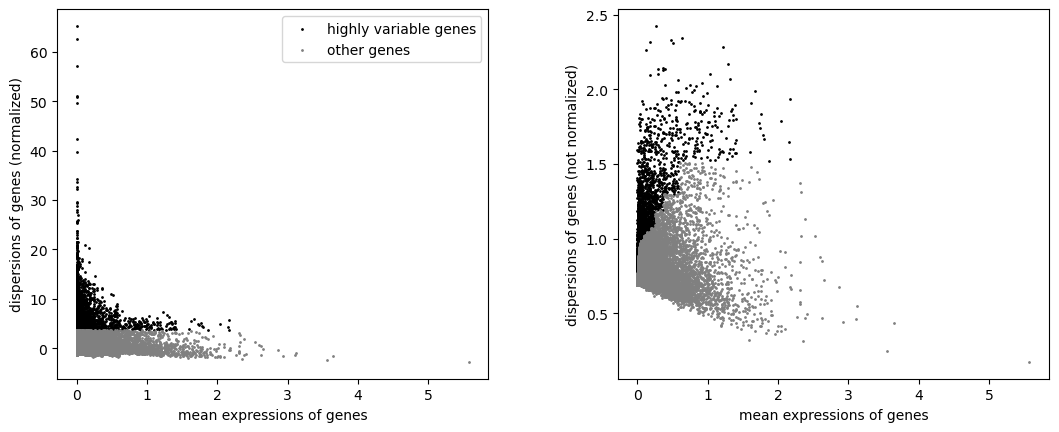

In [96]:
nHVG = 3000 

sc.pp.highly_variable_genes(
    adata, 
    flavor='cell_ranger',
    n_top_genes=nHVG
)

print("we kept", nHVG, "highly variable genes out of", adata.shape[1], "genes")
sc.pl.highly_variable_genes(adata)

In [97]:
adata.var['highly_variable'].value_counts()

highly_variable
False    31176
True      3000
Name: count, dtype: int64

new AnnData object with the HVG only

In [98]:
adata_hvg = adata[:, adata.var['highly_variable']].copy()

## 4. Scaling & PCA

In [99]:
# Scaling (3s)
sc.pp.scale(adata_hvg, max_value = 10)

/opt/anaconda3/envs/scanpy310/lib/python3.10/functools.py:889: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


In [ ]:
# PCA (7min13)
sc.tl.pca(adata_hvg)


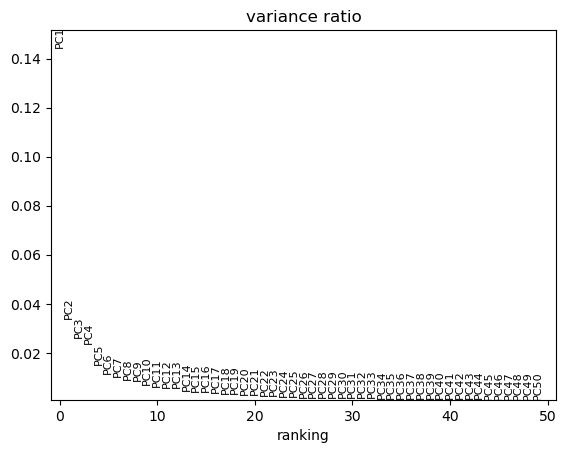

In [101]:
sc.pl.pca_variance_ratio(adata_hvg, n_pcs = 50) # elbow plot to see how many PCs to keep

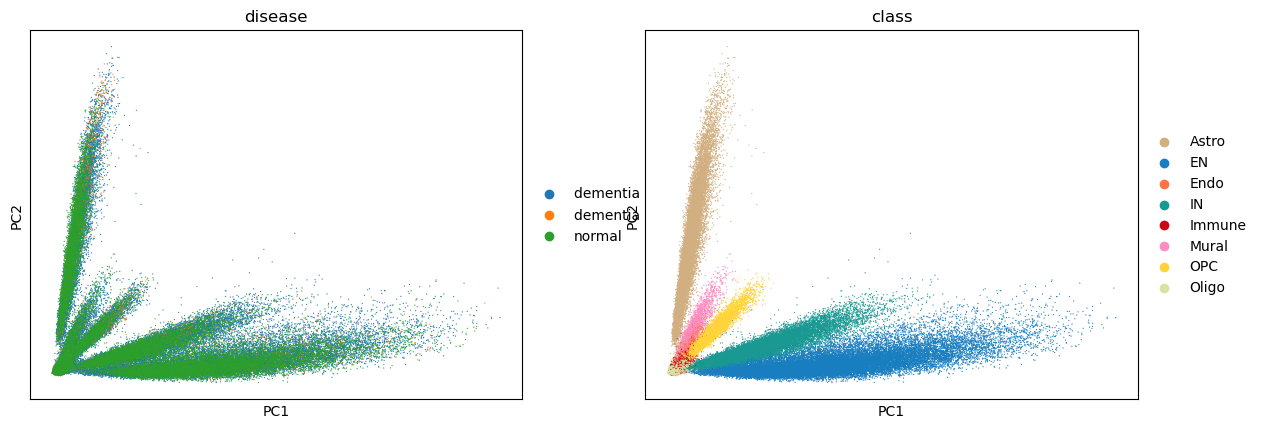

In [102]:
sc.pl.pca(
    adata_hvg,
    color = ["disease", "class"],
    ncols = 3,
    size = 3,
)

## Batch effect correction??

In [27]:
# 37 sec
import bbknn
# bbknn.bbknn(adata_hvg, batch_key='donor_id')
sc.external.pp.bbknn(adata_hvg, batch_key="donor_id")

/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 5. Clustering

In [103]:
adata_hvg.obs["class"].value_counts()

class
Oligo     54152
EN        28374
IN        16393
Astro     14614
Immune     6523
OPC        5338
Mural      2286
Endo       1252
Name: count, dtype: int64

In [104]:
donors_by_class_and_subclass = (adata_hvg.obs.groupby(["class", "subclass"], observed=True)["donor_id"].nunique())
donors_by_class_and_subclass

class   subclass     
Astro   Astro            29
EN      EN_L2_3_IT       29
        EN_L3_5_IT_1     29
        EN_L3_5_IT_2     29
        EN_L3_5_IT_3     29
        EN_L5_6_NP       27
        EN_L5_ET         11
        EN_L6B           27
        EN_L6_CT         27
        EN_L6_IT_1       28
        EN_L6_IT_2       25
Endo    Endo             29
IN      IN_ADARB2        28
        IN_LAMP5_LHX6    29
        IN_LAMP5_RELN    29
        IN_PVALB         29
        IN_PVALB_CHC     29
        IN_SST           29
        IN_VIP           29
Immune  Micro            29
        PVM              27
        Adaptive         22
Mural   VLMC             27
        SMC              22
        PC               29
OPC     OPC              29
Oligo   Oligo            29
Name: donor_id, dtype: int64

### Neighbors

In [105]:
# 11 sec
# number of neighbors
# we chose 30 PCs because after that the variance ratio doesn't decrease that much
nPC = 30

sc.pp.neighbors(adata_hvg, n_pcs = nPC)

/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Clustering

In [119]:
#import igraph
#import leidenalg

sc.tl.leiden(adata_hvg, resolution = 0.0009)

print("Number of clusters :", len(adata_hvg.obs['leiden'].cat.categories))

Number of clusters : 8


### UMAP

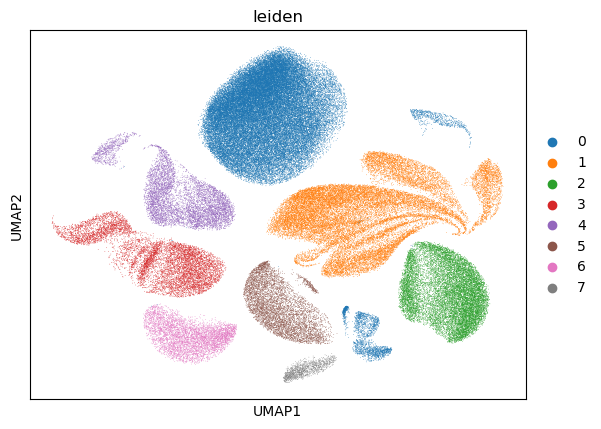

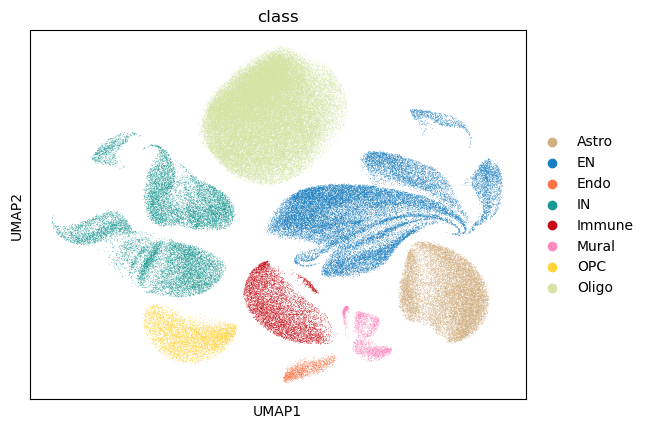

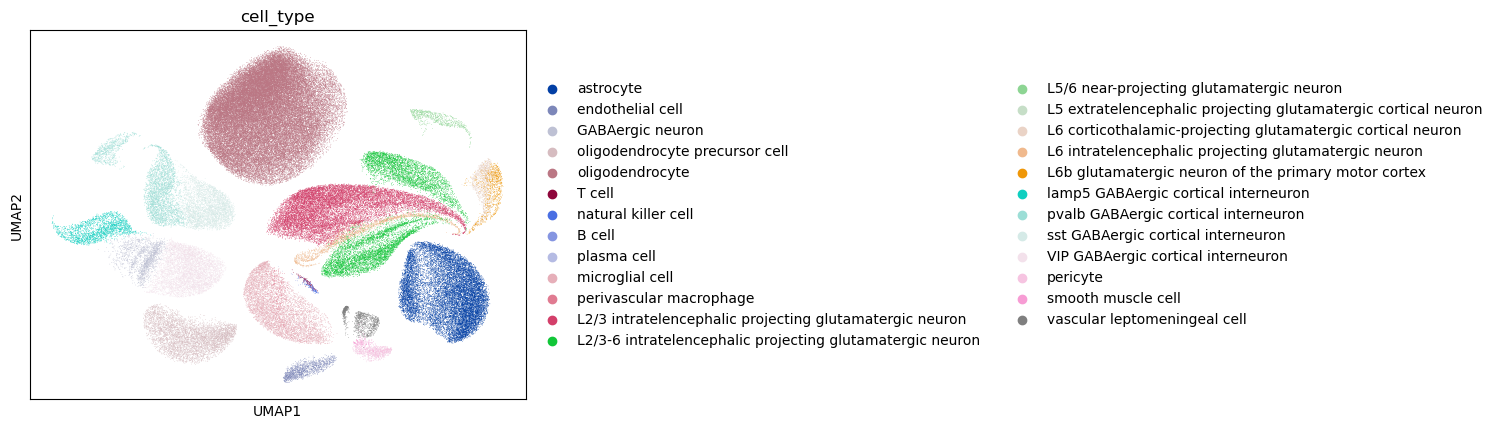

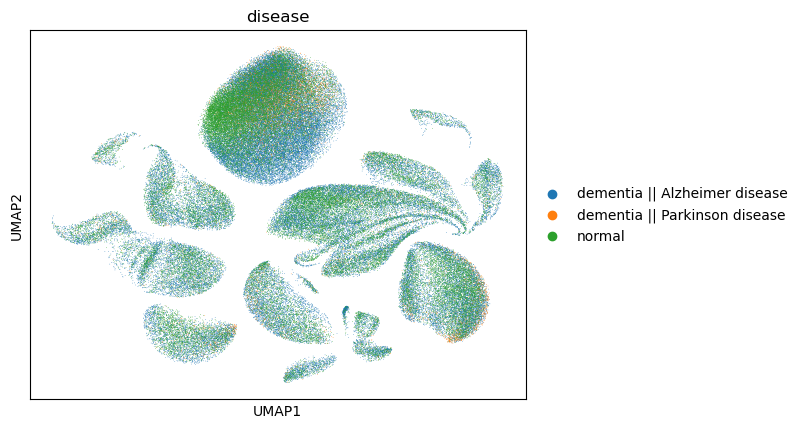

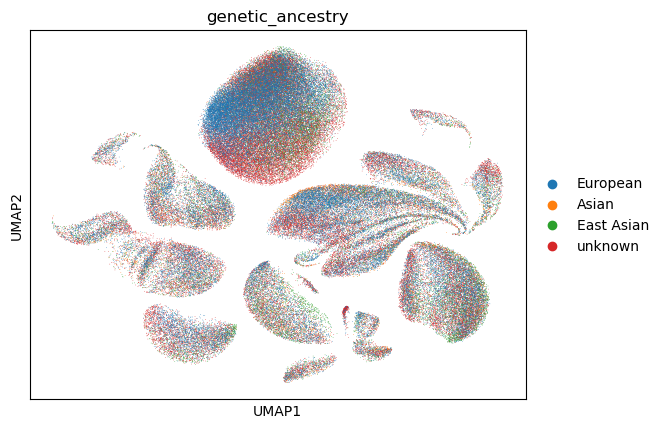

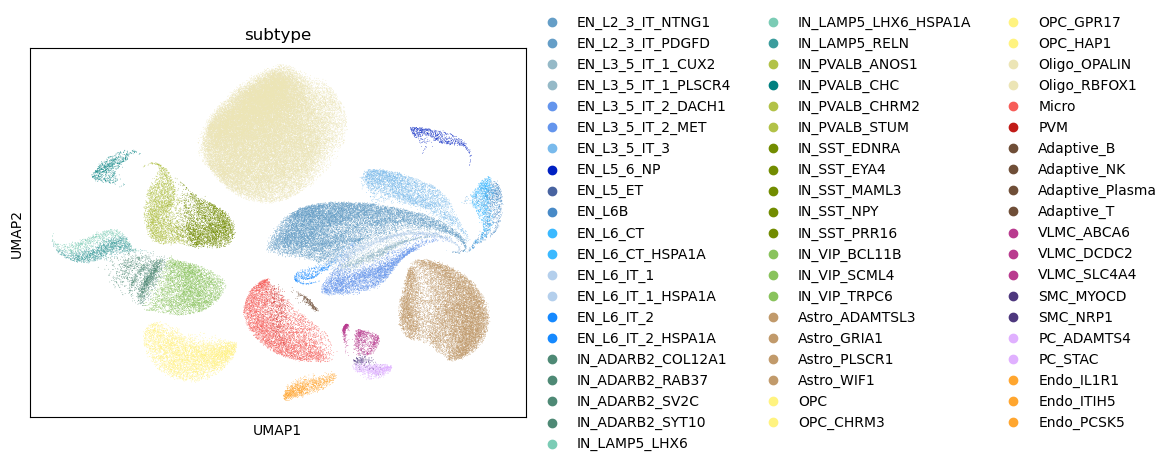

In [117]:
# UMAP

sc.pl.umap(adata_hvg, color="leiden")

sc.pl.umap(adata_hvg, color="class")

sc.pl.umap(adata_hvg, color='cell_type')

sc.pl.umap(adata_hvg, color="disease")
sc.pl.umap(adata_hvg, color="genetic_ancestry")

sc.pl.umap(adata_hvg, color='subtype')

KeyError: 'Could not find key log1p_total_counts in .var_names or .obs.columns.'

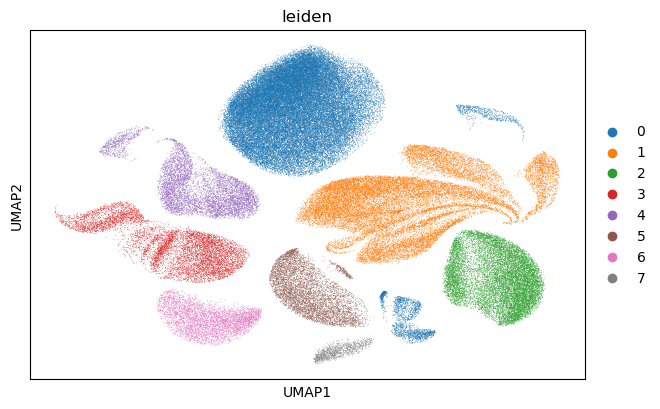

In [120]:
sc.pl.umap(
    adata_hvg,
    color = ["leiden", "log1p_total_counts", "pct_counts_mt", "log1p_n_genes_by_counts"],
    wspace = 0.5,
    ncols = 2,
)

## **6. Annotation**

### **6.1 Manual Annotation**

#### Marker gene set
We first define known marker genes of the cell types that we think are represented by the clusters. We only keep the genes in that list that are found in our data.

In [34]:
# Define marker genes for each cell type
marker_genes = {
    "Astro" : ["ENSG00000135821", "ENSG00000125398", "ENSG00000171885", "ENSG00000152661", "ENSG00000165795", "ENSG00000131095", "ENSG00000144908"],
    "Endo" : ["ENSG00000184113", "ENSG00000229515"],
    "Micro" : ["ENSG00000125730", "ENSG00000019582" ,"ENSG00000168329","ENSG00000182578", "ENSG00000173372"],
    "Oligo" : ["ENSG00000197971", "ENSG00000204655", "ENSG00000123560", "ENSG00000168314", "ENSG00000105695"],
    "OPC" : ["ENSG00000184221", "ENSG00000205927", "ENSG00000150275", "ENSG00000134853"],
    "EN" : ["ENSG00000070808", "ENSG00000154146", "ENSG00000119042", "ENSG00000104888"],
    "IN" : ["ENSG00000128683", "ENSG00000136750"],
    "Mural" : ["ENSG00000113721", "ENSG00000175084", "ENSG00000173546"]
    }

marker_genes

# Only keep the marker genes find in our data

marker_genes_in_data = {}
for ct, markers in marker_genes.items():
    markers_found = []
    for marker in markers:
        if marker in adata_hvg.var.index:
            markers_found.append(marker)
    marker_genes_in_data[ct] = markers_found

marker_genes_in_data
 

{'Astro': ['ENSG00000171885',
  'ENSG00000152661',
  'ENSG00000131095',
  'ENSG00000144908'],
 'Endo': ['ENSG00000184113'],
 'Micro': ['ENSG00000125730',
  'ENSG00000019582',
  'ENSG00000168329',
  'ENSG00000182578'],
 'Oligo': ['ENSG00000123560'],
 'OPC': ['ENSG00000150275', 'ENSG00000134853'],
 'EN': [],
 'IN': ['ENSG00000128683', 'ENSG00000136750'],
 'Mural': ['ENSG00000113721']}

Listing cell types we want to show the markers for:

In [35]:
cell_types = ["Astro", "Endo", "Micro", "Oligo", "OPC", "EN", "IN", "Mural"]
cell_types

['Astro', 'Endo', 'Micro', 'Oligo', 'OPC', 'EN', 'IN', 'Mural']

Plotting one UMAP per marker for each cell type:

ASTRO:


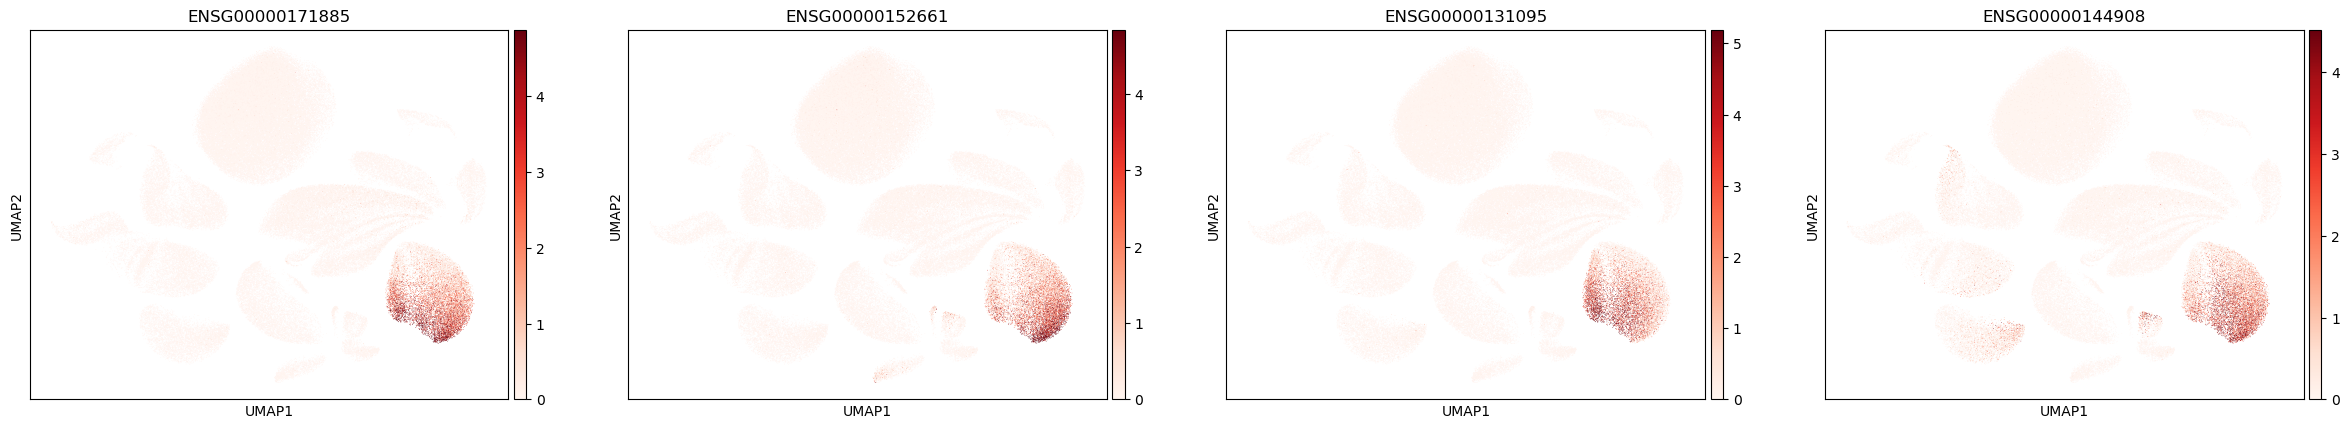





ENDO:


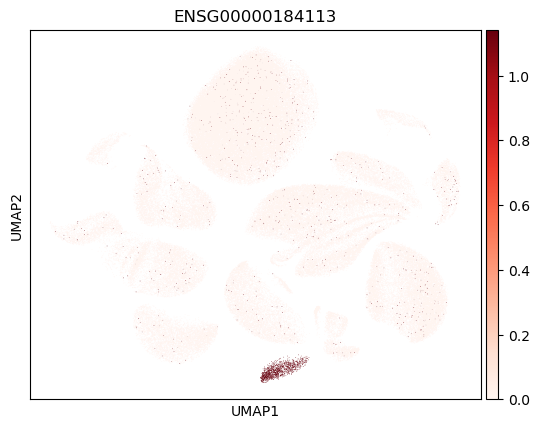





MICRO:


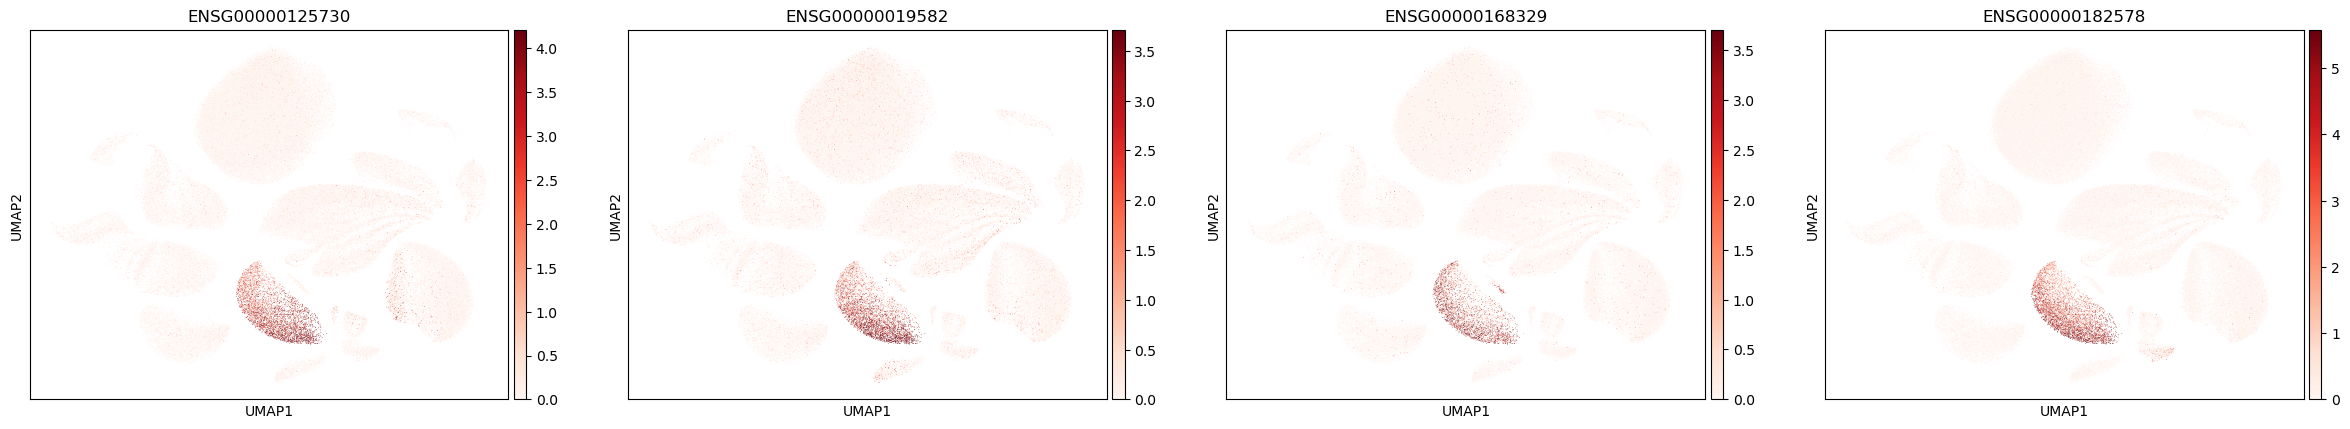





OLIGO:


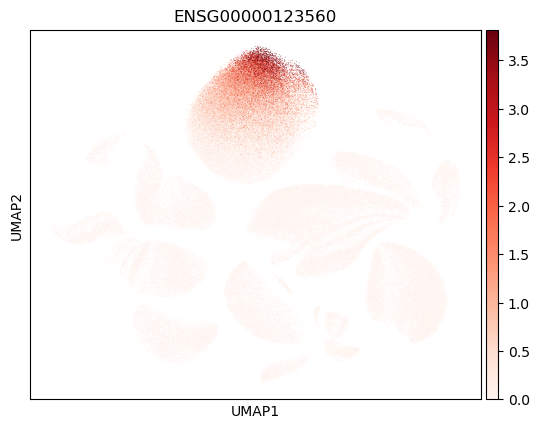





OPC:


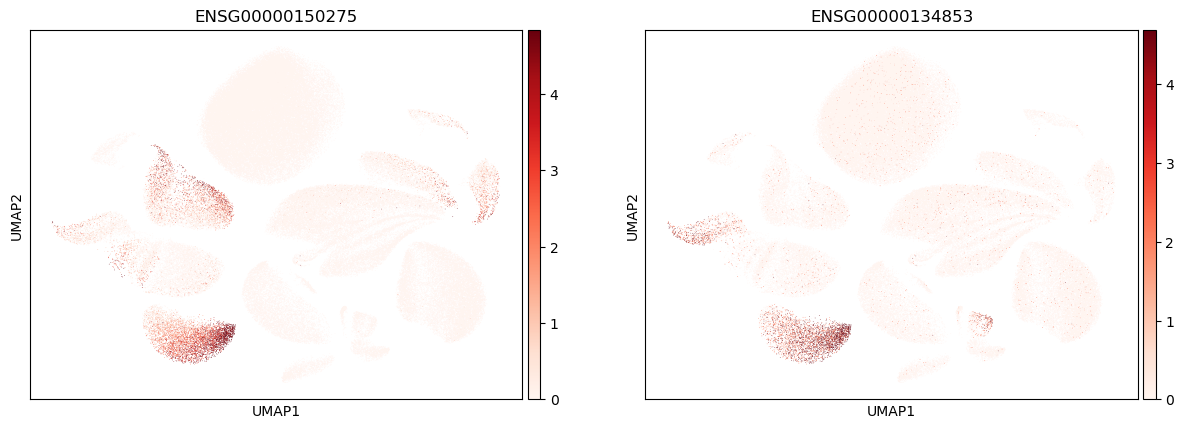





EN: No marker genes found in data.

IN:


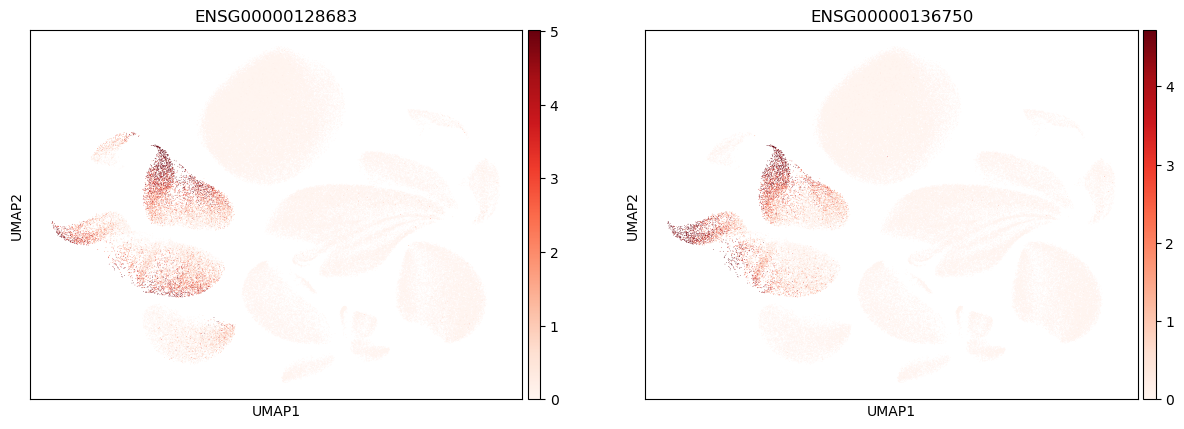





MURAL:


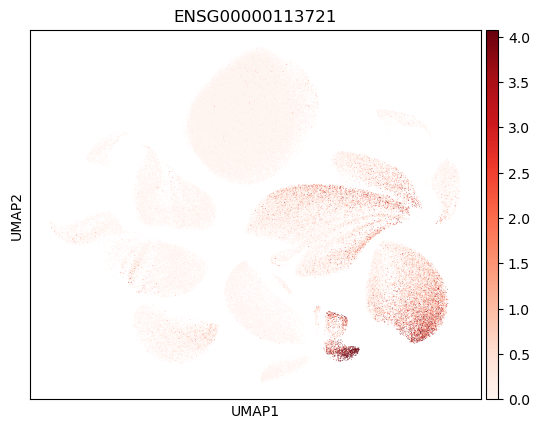

In [36]:
for ct in cell_types:
    markers = marker_genes_in_data[ct]
    if not markers:  # Skip if the list is empty
        print(f"{ct.upper()}: No marker genes found in data.\n")
        continue
    
    print(f"{ct.upper()}:")  # print cell subtype name
    sc.pl.umap(
        adata_hvg,
        color = markers,
        vmin = 0,
        vmax = "p99",
        sort_order = False,
        cmap = "Reds",
    )
    
    print("\n\n\n")  # print white space for legibility

Dotplot visualization of marker gene expression per cluster:

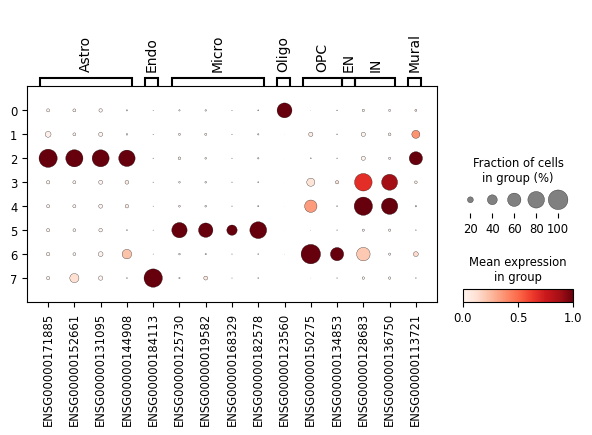

In [37]:
sc.pl.dotplot(
    adata_hvg,
    groupby = "leiden",
    var_names = marker_genes_in_data,
    standard_scale = "var",  # standard scale: normalize each gene to range from 0 to 1
)

Referring to both representations, we can manually annotate the clusters:

In [38]:
cl_annotation = {
    "0": "Oligo",
    "1": "EN",
    "2": "Astro", # and mural? 
    "3": "Micro",
    "4": "IN", 
    "5" : "IN", # need to find distinguishing markers from cluster 4
    "6" : "OPC",
    "7" : "Endo"
}

To visualize the annotations:

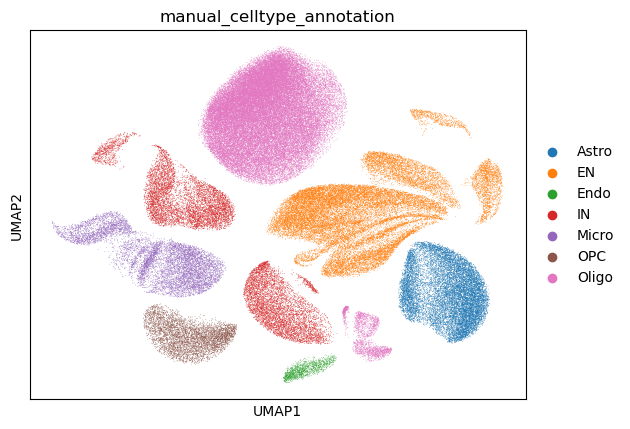

In [39]:
adata_hvg.obs["manual_celltype_annotation"] = adata_hvg.obs.leiden.map(cl_annotation)

sc.pl.umap(adata_hvg, color = ["manual_celltype_annotation"])

To confirm our annotations, we can find the differentially expressed genes for each cluster as compared to the others. We also want to use this to distinguish clusters 4 and 5.

In [40]:
# Calculating differentially expressed genes for each cluster 
    ## We are using the rank_genes_groups function from scanpy for annotations, but for downstream analyses, we will do pseudo-bulk differential expression to avoid pseudoreplication issues

sc.tl.rank_genes_groups(
    adata_hvg, groupby = "leiden", method = "wilcoxon", key_added = "dea_leiden"
)

# Visualizing the expression of the 5 top DE genes per cluster (dotplot representation)
sc.pl.rank_genes_groups_dotplot(
    adata_hvg, groupby = "leiden", standard_scale = "var", n_genes = 5, key = "dea_leiden"
)

: 

: 

### **6.2 Automated Annotation**
We thought it would be interesting to attempt automated annotation of our clusters based on a wider set of genes, using CellTypist *[Conde et al, 2022]*.

In [ ]:
import celltypist # Install the package if needed.
from celltypist import models, annotate

/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/celltypist/classifier.py:11: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('scanpy')` instead
  from scanpy import __version__ as scv


In [ ]:
# To make our data compatible with CellTypist:

adata_celltypist = adata_hvg.copy() 

sc.pp.normalize_total(
    adata_celltypist, target_sum=10**4
)  # normalize to 10,000 counts per cell

sc.pp.log1p(adata_celltypist)  # log-transform

In [ ]:
type(adata_celltypist.X)

adata_celltypist.X

array([[ 1.18942394,  1.18964391,  2.24376504, ...,  1.85575457,
         0.46288089,  1.04932326],
       [ 1.08842451,  1.08863426,  2.11199441, ...,  1.73187414,
         0.41035268,  0.95529358],
       [ 4.56858917,         nan,         nan, ...,         nan,
        -1.52038934,         nan],
       ...,
       [ 1.07221975,  1.07242776,  2.09046128, ...,  1.71172568,
         0.40216201,  0.94026925],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 1.11699138,  1.11720413,  2.14968064, ...,  1.76720319,
         0.42495159,  0.98182224]], shape=(76572, 3000))

To download the CellTypist model for the human prefrontal cortex:

In [ ]:
models.download_models(force_update = True, model = "Adult_Human_PrefrontalCortex.pkl")
celltypistmodel = models.Model.load(model = "Adult_Human_PrefrontalCortex.pkl")

celltypistmodel
celltypistmodel.cell_types
celltypistmodel.features


📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 59
📂 Storing models in /Users/elodiehusson/.celltypist/data/models
💾 Total models to download: 1
💾 Downloading model [1/1]: Adult_Human_PrefrontalCortex.pkl


array(['ISG15', 'GABRD', 'PRDM16', ..., 'BGN', 'SRPK3', 'GAB3'],
      shape=(4304,), dtype=object)

Convert Ensembl IDs to gene symbols in dataset to match Cell Typist model:

In [ ]:
pip install pybiomart

Note: you may need to restart the kernel to use updated packages.


To predict cell identities using the "Adult_Human_PrefrontalCortex" model:

In [ ]:
#predictions = celltypist.annotate(adata_celltypist, model = "Adult_Human_PrefrontalCortex.pkl", majority_voting = True)

## **7. Differential Gene Expression**

check the number of donors per cell_type, we need to delete the whole cell_type line when there are none in one condition.

Here, there are zero donors in CONTROL for B cells. We do the DE without it. Also, note to ourselves for when writting, the cell types that have very few donors are statistically weak ! very important

In [ ]:
adata_raw.obs.groupby(["class", "disease"]).size().unstack(fill_value=0)

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_94454/459670032.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby(["class", "disease"]).size().unstack(fill_value=0)


disease  dementia || Alzheimer disease  dementia || Parkinson disease  normal
class                                                                        
Astro                             8411                           1128    5075
EN                               16990                            830   10554
Endo                               891                             39     322
IN                               10312                            539    5542
Immune                            4064                            383    2076
Mural                             1499                             69     718
OPC                               3003                            323    2012
Oligo                            33071                           4461   16620

In [ ]:
# 16sec
df = adata_raw.to_df()  # 
# metadata alignées avec les cellules
meta = adata_raw.obs[["donor_id", "class", "disease"]]

In [17]:
df["donor_id"] = meta["donor_id"].values
df["class"] = meta["class"].values
df["disease"] = meta["disease"].values

In [ ]:
pb = (df.groupby(["class", "donor_id", "disease"]).sum().reset_index())
# supprimer groupes vides
pb = pb.dropna(axis=0, how="all")

# Suppression des B cells + plasma cells
# pb_wo_Bcells = pb[~pb["class"].isin(["B cell", "plasma cell"])]

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_94454/2425487319.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pb = (df.groupby(["class", "donor_id", "disease"]).mean())


In [19]:
pb

class    donor_id                        disease  ENSG00000000003  \
0    Astro    Donor_31  dementia || Alzheimer disease         0.165116   
1    Astro    Donor_82  dementia || Alzheimer disease         0.025478   
2    Astro   Donor_137  dementia || Alzheimer disease         0.287500   
3    Astro   Donor_228  dementia || Alzheimer disease         0.111307   
4    Astro   Donor_310  dementia || Alzheimer disease         0.083916   
..     ...         ...                            ...              ...   
227  Oligo  Donor_1003                         normal         0.000000   
228  Oligo  Donor_1007  dementia || Alzheimer disease         0.000000   
229  Oligo  Donor_1146                         normal         0.004369   
230  Oligo  Donor_1278                         normal         0.003364   
231  Oligo  Donor_1467  dementia || Parkinson disease         0.008333   

     ENSG00000000005  ENSG00000000419  ENSG00000000457  ENSG00000000460  \
0           0.016279         0.562791         0.402326         0.323256   
1           0.000000         0.267516         0.146497         0.076433   
2           0.007500         0.415000         0.350000         0.212500   
3           0.001767         0.455830         0.348057         0.217314   
4           0.002331         0.482517         0.293706         0.221445   
..               ...              ...              ...              ...   
227         0.000000         0.272727         0.161290         0.278592   
228         0.000000         0.138889         0.101852         0.138889   
229         0.000000         0.139362         0.093054         0.072084   
230         0.000421         0.339781         0.216989         0.269975   
231         0.000000         0.458333         0.316667         0.291667   

     ENSG00000000938  ENSG00000000971  ...  ENSG00000288600  ENSG00000288602  \
0           0.002326         0.009302  ...         0.000000         0.227907   
1           0.012739         0.025478  ...         0.000000         0.038217   
2           0.002500         0.007500  ...         0.005000         0.312500   
3           0.003534         0.001767  ...         0.001767         0.210247   
4           0.002331         0.009324  ...         0.000000         0.235431   
..               ...              ...  ...              ...              ...   
227         0.000000         0.002933  ...         0.002933         0.087977   
228         0.000000         0.009259  ...         0.000000         0.037037   
229         0.001747         0.003058  ...         0.000000         0.037134   
230         0.002103         0.012616  ...         0.000841         0.113541   
231         0.000000         0.008333  ...         0.000000         0.208333   

     ENSG00000288605  ENSG00000288606  ENSG00000288611  ENSG00000288612  \
0           0.086047         0.013953         0.000000         0.048837   
1           0.012739         0.000000         0.000000         0.019108   
2           0.077500         0.012500         0.000000         0.050000   
3           0.044170         0.017668         0.001767         0.053004   
4           0.074592         0.011655         0.000000         0.041958   
..               ...              ...              ...              ...   
227         0.000000         0.046921         0.002933         0.011730   
228         0.000000         0.037037         0.000000         0.027778   
229         0.001311         0.013543         0.000000         0.012669   
230         0.000000         0.031119         0.000841         0.029016   
231         0.008333         0.041667         0.000000         0.041667   

     ENSG00000288622  ENSG00000288637  ENSG00000288642  ENSG00000288643  
0           0.009302         0.006977         0.034884         0.030233  
1           0.000000         0.000000         0.063694         0.012739  
2           0.010000         0.005000         0.042500         0.040000  
3           0.005300         0.008834         0.017668   

pseudo-bulk matrix : 

- lines : cell type per donor 
- columns : mean expression levels

each donor is an indepedant observation. We cannot compare each cell one by one because it's statistically false. We do a pseudo-bulk donor x cell type.

Each value corresponds to the mean log-normalized of 1 donor for 1 cell type

In [20]:
# 1min
pb.to_csv("pseudobulk_matrix.csv", index = False)

la suite dans R

load DE results 

In [19]:
x = pd.read_csv("DE_results/DE_Astro_ADvsCTRL.csv",index_col=0)
x["adj.P.Val"]

ENSG00000255389    0.999982
ENSG00000164663    0.999982
ENSG00000112394    0.999982
ENSG00000154258    0.999982
ENSG00000224445    0.999982
                     ...   
ENSG00000123095    0.999982
ENSG00000115486    0.999982
ENSG00000254538    0.999982
ENSG00000109084    0.999982
ENSG00000259658    0.999982
Name: adj.P.Val, Length: 19658, dtype: float64

In [73]:
sub = adata.X[:50, :50].toarray()
np.unique(sub)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 17., 30., 31., 36.], dtype=float32)

<Axes: >

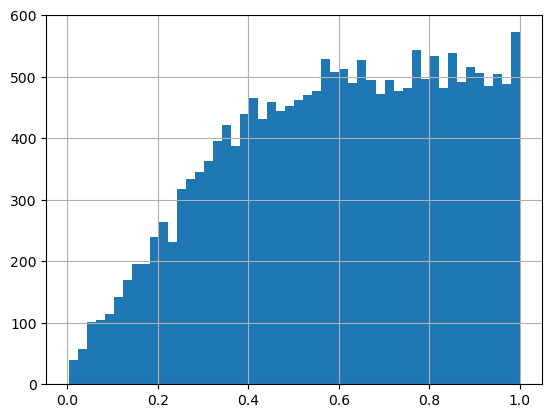

In [18]:
x["P.Value"].hist(bins=50)

les X sont des entiers

In [ ]:
np.unique(adata.X[:1000,:100].toarray()) 

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  47.,  48.,  49.,  50.,  51.,  52.,  58.,  59.,  60.,
        65.,  70.,  72.,  76.,  81.,  83.,  85.,  89.,  90., 101.],
      dtype=float32)

In [75]:
print(adata)
print(adata.layers.keys())
print(adata.raw)
print(adata.uns.keys())

AnnData object with n_obs × n_vars = 128932 × 34176
    obs: 'Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'is_primary_data', 'AD_status', 'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status', 'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder', 'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry', 'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene_name', 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_term_id', 'schema_reference', 'sch

DATASET IS RAW COUNTS ????????

In [86]:
import numpy as np
from scipy import sparse

X = adata.X
X_csr = X if sparse.issparse(X) else sparse.csr_matrix(X)

data = X_csr.data  # valeurs non nulles

# Écart max entre la valeur et l’entier le plus proche
max_frac = np.max(np.abs(data - np.round(data)))
print("Max difference to integer:", max_frac)

Max difference to integer: 0.0


In [87]:
import numpy as np

cell_sums = np.array(X_csr.sum(axis=1)).ravel()

print("Premieres sommes de X:", cell_sums[:10])
print("Premier n_counts:", adata.obs["n_counts"].head(10).values)

print("Tout pareil ? ", np.allclose(cell_sums, adata.obs["n_counts"].values))

Premieres sommes de X: [20173.  6535.  3429. 21489. 14401.  8284.  6153.  7496. 26829.  7470.]
Premier n_counts: [20297.  6572.  3458. 21566. 14487.  8342.  6172.  7516. 27018.  7493.]
Tout pareil ?  False


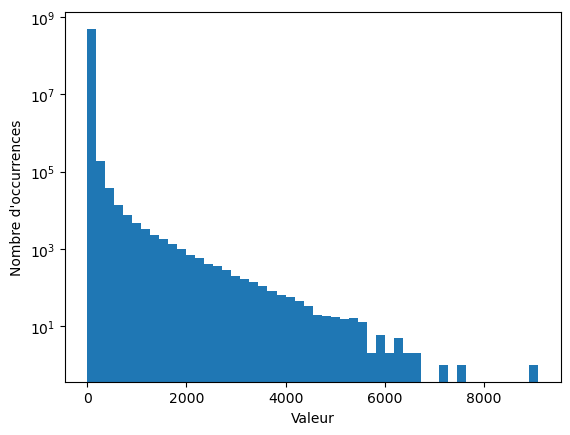

Min non-zero: 1.0
Max: 9087.0
Quelques valeurs uniques: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]
Nb de valeurs distinctes: 3576


In [88]:
import matplotlib.pyplot as plt

vals = data  # non-zero
plt.hist(vals, bins=50)
plt.yscale("log")
plt.xlabel("Valeur")
plt.ylabel("Nombre d'occurrences")
plt.show()

print("Min non-zero:", vals.min())
print("Max:", vals.max())
print("Quelques valeurs uniques:", np.unique(vals)[:20])
print("Nb de valeurs distinctes:", len(np.unique(vals)))

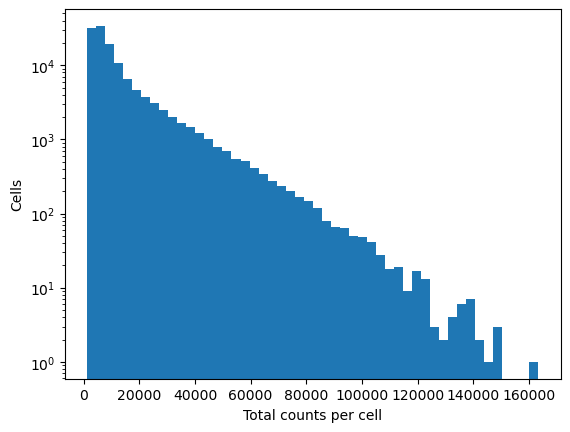

count    128932.000000
mean      12646.060547
std       14012.671875
min        1247.000000
25%        4501.000000
50%        7540.000000
75%       14416.000000
max      163298.000000
Name: n_counts, dtype: float64


In [89]:
import matplotlib.pyplot as plt

plt.hist(adata.obs["n_counts"], bins=50)
plt.xlabel("Total counts per cell")
plt.ylabel("Cells")
plt.yscale("log")
plt.show()

print(adata.obs["n_counts"].describe())

In [90]:
import numpy as np

vals = data
print("quantiles X:", np.quantile(vals, [0.5, 0.9, 0.99, 0.999]))

log_vals = np.log1p(vals)
print("quantiles log1p(X):", np.quantile(log_vals, [0.5, 0.9, 0.99, 0.999]))

quantiles X: [  1.   6.  30. 127.]
quantiles log1p(X): [0.69314718 1.9459101  3.43398714 4.85203028]


In [91]:
max_frac
np.allclose(cell_sums, adata.obs["n_counts"])
vals.min(), vals.max()
np.unique(vals)[:20]
len(np.unique(vals))
adata.obs["n_counts"].describe()

count    128932.000000
mean      12646.060547
std       14012.671875
min        1247.000000
25%        4501.000000
50%        7540.000000
75%       14416.000000
max      163298.000000
Name: n_counts, dtype: float64